<h1 style="color: #ffhhbb;">Import Modules</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import os
import sys

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.Data_loader import load_data
from scripts.analysis import feature_engineering, handle_missing_values, encode_categorical_data, scale_data

In [4]:
Data = load_data(r'C:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\Data\MachineLearningRating_v3.csv')
Data.head(5)

c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\Data_loader.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
Data = load_data(r'C:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\Data\MachineLearningRating_v3.csv')
Data.tail(5)

c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\Data_loader.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [8]:
Data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

<h2 style="color: #ffffbb;">Data Preparation</h2>

In [7]:
Data.shape

(1000098, 52)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
# Identify numerical and categorical columns
numerical_columns = Data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = Data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Categorical columns: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


<h3 style="color: #ffffaa;">Handling missing value</h3>

In [10]:
# Step 1: Check missing values percentage
missing_percentage = Data.isnull().mean() * 100
print(missing_percentage)

UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity                 0.055195
kilowatts                

In [11]:
print("Before Handling Missing Values:")
print(Data.head)

# Handle missing values
processed_data = handle_missing_values(Data)

print("\nAfter Handling Missing Values:")
print(processed_data.head)

Before Handling Missing Values:
<bound method NDFrame.head of          UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:0

c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\analysis.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\analysis.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b


After Handling Missing Values:
<bound method NDFrame.head of          UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:0

<h3 style="color: #ffffaa;">Feature Engineering</h3>


In [12]:
# Apply the feature engineering method
engineered_data = feature_engineering(processed_data)

# Display the result
print(engineered_data.head)

c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\analysis.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')


<bound method NDFrame.head of          UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        C

In [13]:
#  Select relevant features for insurance premium prediction
relevant_features = [
    'IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender',
    'VehicleType', 'RegistrationYear', 'make', 'Model','PostalCode','Province',
    'bodytype','SumInsured', 'CalculatedPremiumPerTerm',
    'CoverCategory', 'CoverType', 'CoverGroup',
    'ClaimsToPremiumRatio', 'VehicleAge', 'IsNewVehicle','TotalClaims','TotalPremium'
]
selected_features = [feature for feature in relevant_features if feature in engineered_data.columns]
selected_data = Data[selected_features]

In [14]:
selected_data.head()

,IsVATRegistered,LegalType,MaritalStatus,Gender,VehicleType,RegistrationYear,make,Model,PostalCode,Province,...,SumInsured,CalculatedPremiumPerTerm,CoverCategory,CoverType,CoverGroup,ClaimsToPremiumRatio,VehicleAge,IsNewVehicle,TotalClaims,TotalPremium
0,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,21.929825
1,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,21.929825
2,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,0.000000
3,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,0.0,22,1,0.0,512.848070
4,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,0.0,22,1,0.0,0.000000


In [15]:
selected_data.select_dtypes(include=['object','bool']).columns

Index(['IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender',
       'VehicleType', 'make', 'Model', 'Province', 'bodytype', 'CoverCategory',
       'CoverType', 'CoverGroup'],
      dtype='object')

<h3 style="color: #ffffaa;">Encoding Categorical Data</h3>

In [16]:
print("Before Encoding:")
print(selected_data)

# One-Hot Encoding
onehot_encoded_data = encode_categorical_data(selected_data, method='onehot', columns=['IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender', 
                      'VehicleType', 'make', 'Model', 'bodytype', 'Province',
                      'CoverCategory', 'CoverType', 'CoverGroup'])

print("\nAfter One-Hot Encoding:")
print(onehot_encoded_data)

# Label Encoding
label_encoded_data = encode_categorical_data(selected_data, method='label', columns=['IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender', 
                      'VehicleType', 'make', 'Model', 'bodytype', 'Province',
                      'CoverCategory', 'CoverType', 'CoverGroup'])
print("\nAfter Label Encoding:")
print(label_encoded_data)

Before Encoding:
         IsVATRegistered          LegalType  MaritalStatus         Gender  \
0                   True  Close Corporation  Not specified  Not specified   
1                   True  Close Corporation  Not specified  Not specified   
2                   True  Close Corporation  Not specified  Not specified   
3                   True  Close Corporation  Not specified  Not specified   
4                   True  Close Corporation  Not specified  Not specified   
...                  ...                ...            ...            ...   
1000093            False         Individual         Single           Male   
1000094            False         Individual         Single           Male   
1000095            False         Individual         Single           Male   
1000096            False         Individual         Single           Male   
1000097            False         Individual         Single           Male   

               VehicleType  RegistrationYear           mak


<h3 style="color: #ffffaa;">Scaling</h3>

In [17]:
print("Before Scaling:")
print(label_encoded_data)

# Apply standard scaling
scaled_data_standard = scale_data(label_encoded_data, method='standard')
print("\nAfter Standard Scaling:")
print(scaled_data_standard)

Before Scaling:
         IsVATRegistered  LegalType  MaritalStatus  Gender  VehicleType  \
0                      1          0              1       2            4   
1                      1          0              1       2            4   
2                      1          0              1       2            4   
3                      1          0              1       2            4   
4                      1          0              1       2            4   
...                  ...        ...            ...     ...          ...   
1000093                0          1              2       1            4   
1000094                0          1              2       1            4   
1000095                0          1              2       1            4   
1000096                0          1              2       1            4   
1000097                0          1              2       1            4   

         RegistrationYear  make  Model  PostalCode  Province  ...  SumInsured  \
0 


<h3 style="color: #ffffaa;">Train-Test Split</h3>

In [18]:
# Split data into X and y
X=scaled_data_standard.drop(['TotalPremium','TotalClaims'],axis=1)
y=scaled_data_standard['TotalPremium']

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y are pandas DataFrames or numpy arrays
sample_size = 100000  # Desired sample size

# Step 1: Sample 100,000 rows from the data
if len(X) >= sample_size:
    X_sample = X[:sample_size]
    y_sample = y[:sample_size]
else:
    raise ValueError("Data has fewer rows than the requested sample size.")

# Step 2: Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Use the rest of the data if needed
X_rest = X[sample_size:]
y_rest = y[sample_size:]
print("Remaining data shape:", X_rest.shape, y_rest.shape)


X_train shape: (70000, 19)
X_test shape: (30000, 19)
y_train shape: (70000,)
y_test shape: (30000,)
Remaining data shape: (900098, 19) (900098,)



<h1 style="color: #ffffaa;">Modeling Techniques
</h1>

<h3 style="color: #11ccaa;">Linear Regression </h3>

Linear Regression Performance:
Mean Squared Error (MSE): 0.20877421010786537
Mean Absolute Error (MAE): 0.2063195761052214
R-squared (R2): 0.645107749946612

Model Coefficients (Feature Importance):
                     Feature  Coefficient  Importance
12  CalculatedPremiumPerTerm     1.031396    1.031396
13             CoverCategory    -0.054566    0.054566
14                 CoverType     0.054166    0.054166
16      ClaimsToPremiumRatio    -0.021904    0.021904
3                     Gender    -0.015922    0.015922
7                      Model     0.014619    0.014619
6                       make     0.013004    0.013004
5           RegistrationYear     0.011629    0.011629
2              MaritalStatus    -0.009150    0.009150
1                  LegalType     0.009021    0.009021
0            IsVATRegistered     0.008001    0.008001
9                   Province    -0.006964    0.006964
15                CoverGroup    -0.003530    0.003530
4                VehicleType     0.002906    

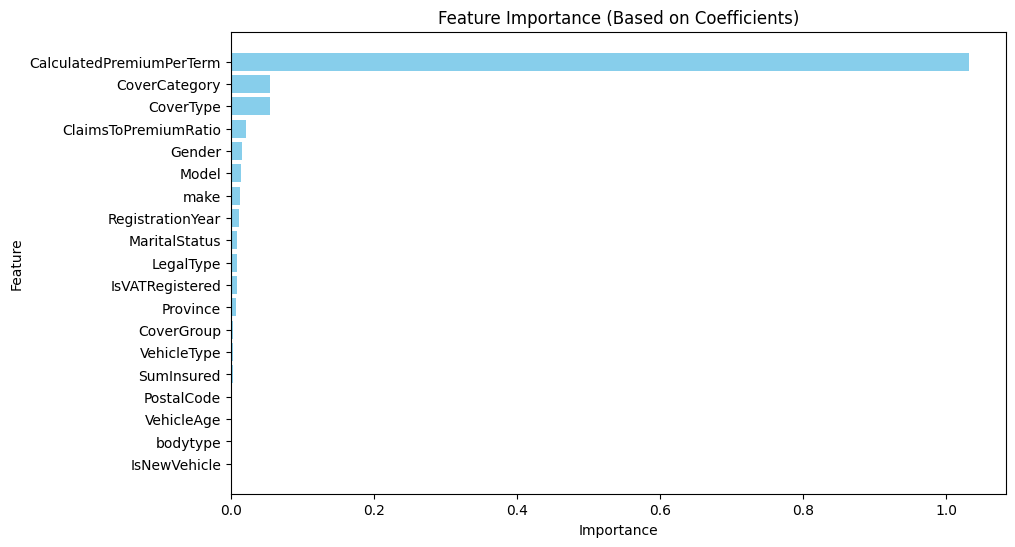

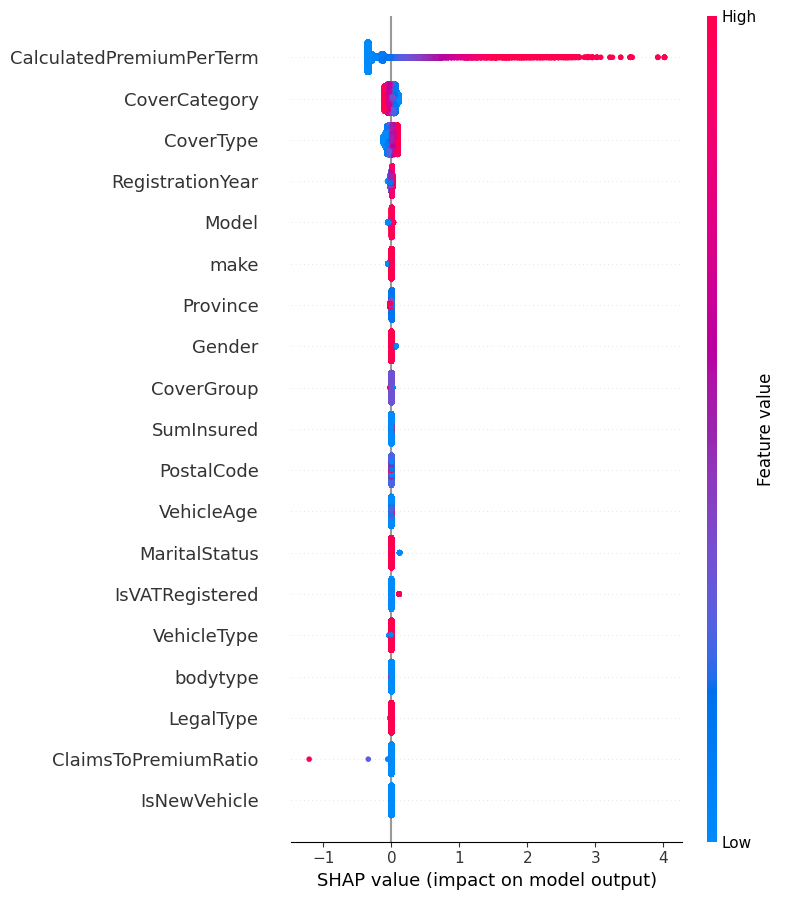

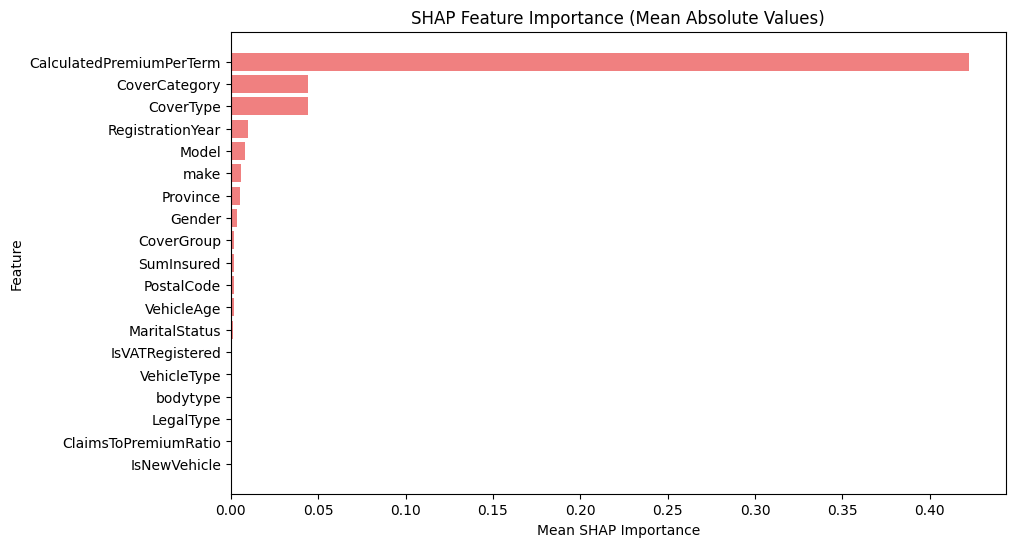

In [22]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Step 4: Feature Importance Analysis (Linear regression coefficients)
print("\nModel Coefficients (Feature Importance):")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients['Importance'] = coefficients['Coefficient'].abs()  # Importance as absolute value of coefficient
coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Based on Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 5: SHAP (SHapley Additive exPlanations) for feature importance analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Additional: Plot SHAP feature importance (mean absolute SHAP values)
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='SHAP Importance', ascending=False)

# Plot mean absolute SHAP values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'], shap_importance['SHAP Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance (Mean Absolute Values)')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Feature')
plt.show()

<h3 style="color: #11ccaa;">Random Forest </h3>

Random Forest Performance:
Mean Squared Error (MSE): 0.19376762926119848
Mean Absolute Error (MAE): 0.19244876758922988
R-squared (R2): 0.6706172189539674

Feature Importance (Random Forest):
                     Feature    Importance
12  CalculatedPremiumPerTerm  9.712163e-01
8                 PostalCode  1.173917e-02
7                      Model  4.066210e-03
6                       make  3.978844e-03
11                SumInsured  3.621608e-03
5           RegistrationYear  1.521524e-03
9                   Province  1.269916e-03
10                  bodytype  9.751152e-04
1                  LegalType  5.123468e-04
17                VehicleAge  5.094146e-04
13             CoverCategory  4.086570e-04
4                VehicleType  7.285890e-05
16      ClaimsToPremiumRatio  5.275592e-05
3                     Gender  4.862961e-05
14                 CoverType  6.516924e-06
15                CoverGroup  9.438821e-08
0            IsVATRegistered  0.000000e+00
2              MaritalStatus  0.00

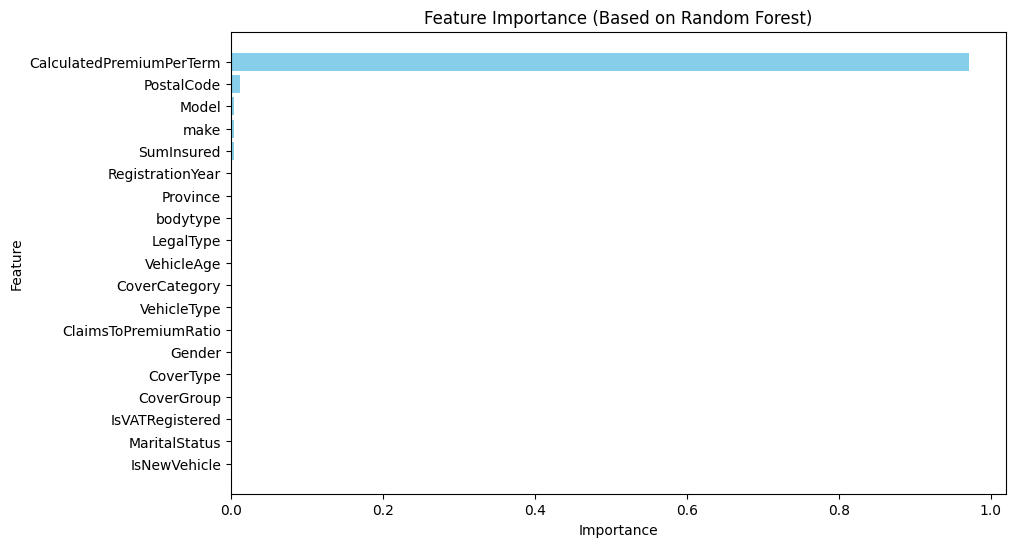

 98%|===================| 29510/30000 [00:58<00:00]        

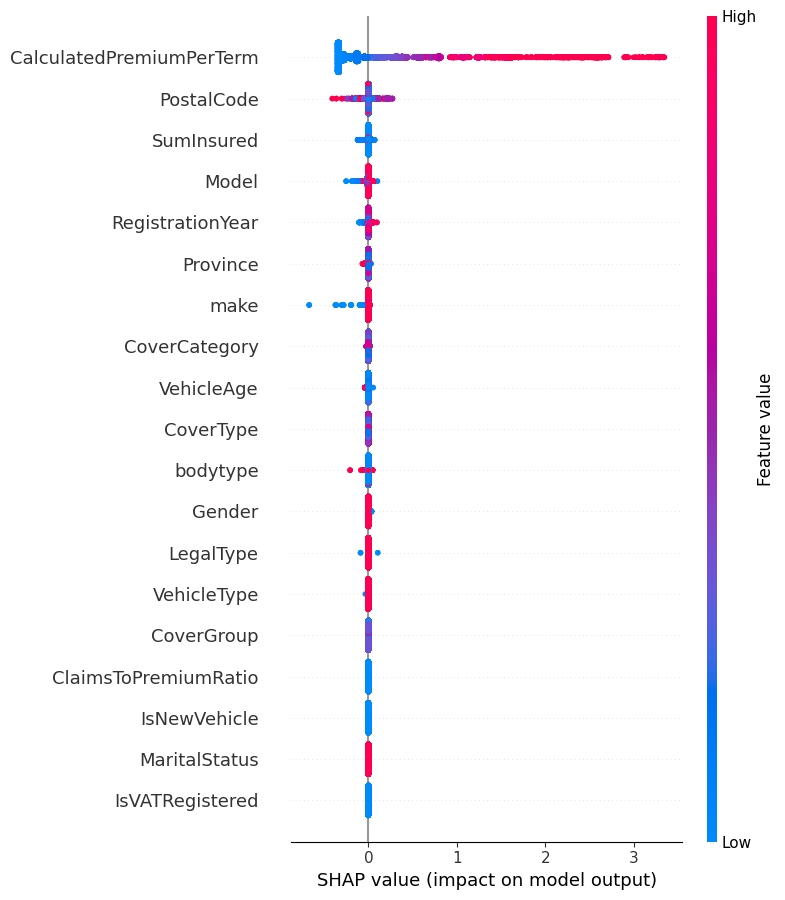

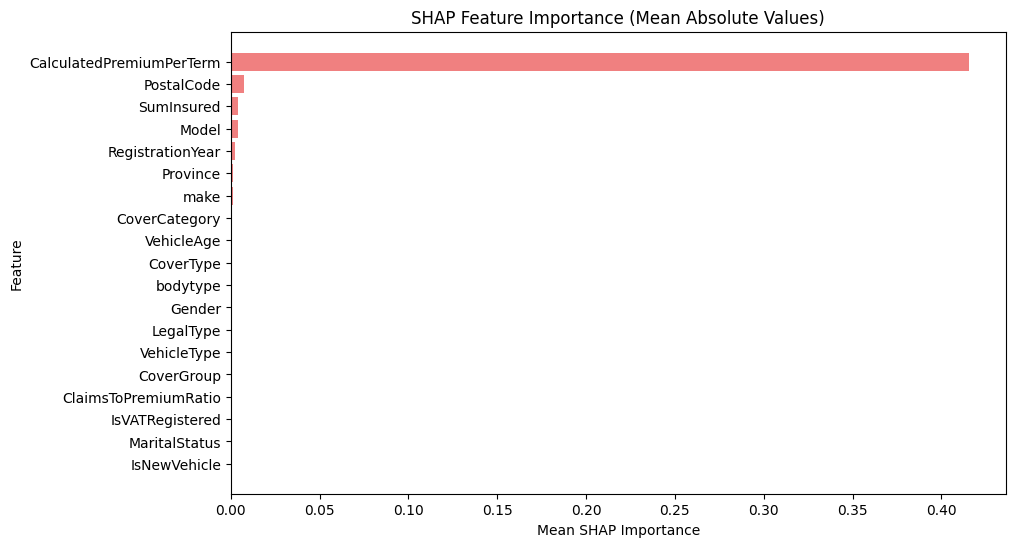

In [28]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Random Forest Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Step 4: Feature Importance Analysis (Random Forest Feature Importances)
print("\nFeature Importance (Random Forest):")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Based on Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 5: SHAP (SHapley Additive exPlanations) for feature importance analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Additional: Plot SHAP feature importance (mean absolute SHAP values)
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='SHAP Importance', ascending=False)

# Plot mean absolute SHAP values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'], shap_importance['SHAP Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance (Mean Absolute Values)')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Feature')
plt.show()


<h3 style="color: #11ccaa;">Decision Tree </h3>

Decision Tree Performance:
Mean Squared Error (MSE): 0.19958739658812433
Mean Absolute Error (MAE): 0.192338996799001
R-squared (R2): 0.6607242809307662

Feature Importance (Decision Tree):
                     Feature  Importance
12  CalculatedPremiumPerTerm    0.973910
8                 PostalCode    0.020366
6                       make    0.003562
5           RegistrationYear    0.001204
11                SumInsured    0.000594
7                      Model    0.000241
3                     Gender    0.000124
0            IsVATRegistered    0.000000
13             CoverCategory    0.000000
17                VehicleAge    0.000000
16      ClaimsToPremiumRatio    0.000000
15                CoverGroup    0.000000
14                 CoverType    0.000000
9                   Province    0.000000
10                  bodytype    0.000000
1                  LegalType    0.000000
4                VehicleType    0.000000
2              MaritalStatus    0.000000
18              IsNewVehicle   

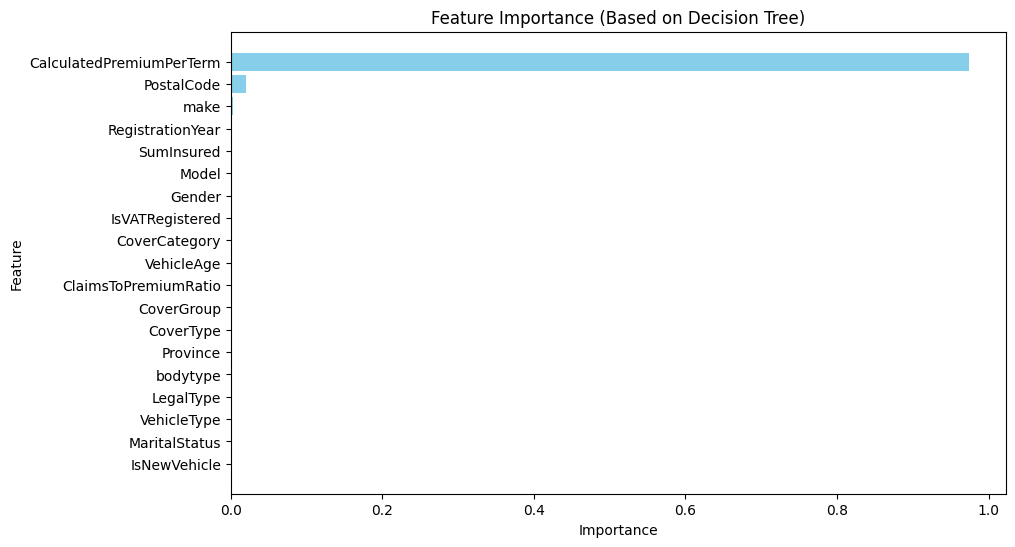

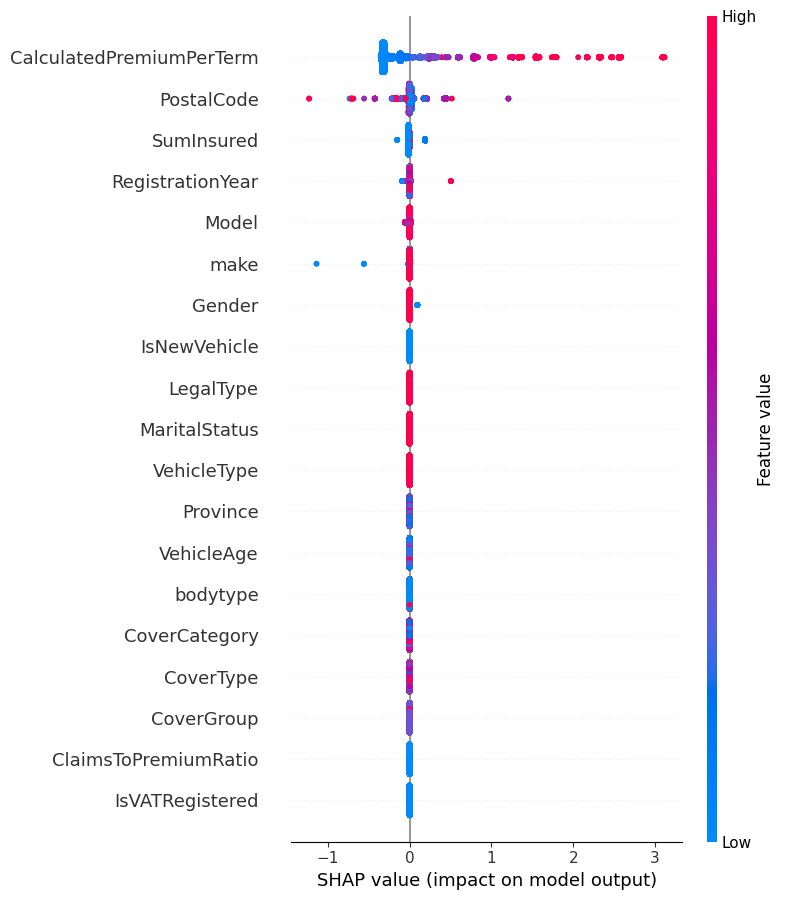

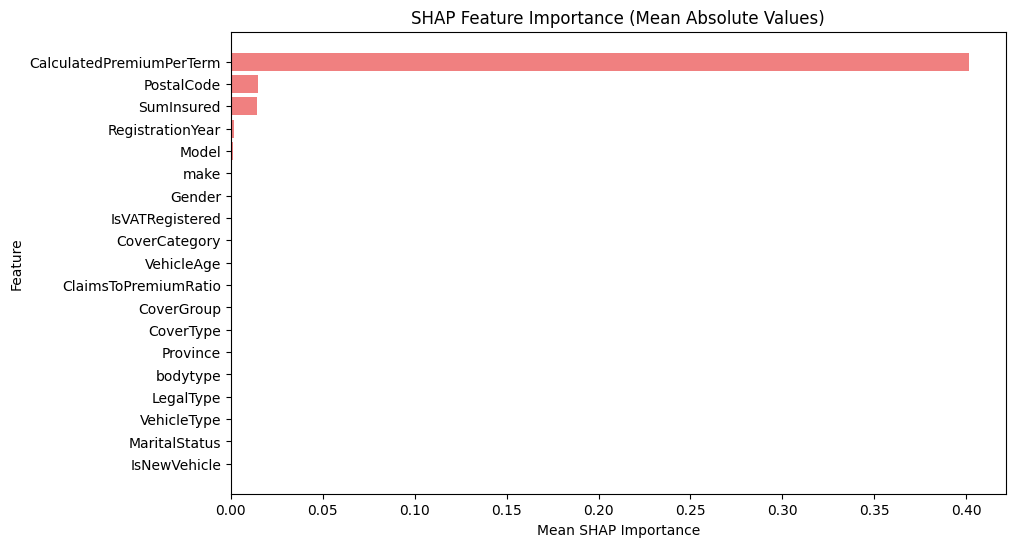

In [27]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Decision Tree Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Step 4: Feature Importance Analysis (Decision Tree Feature Importances)
print("\nFeature Importance (Decision Tree):")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Based on Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 5: SHAP (SHapley Additive exPlanations) for feature importance analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Additional: Plot SHAP feature importance (mean absolute SHAP values)
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='SHAP Importance', ascending=False)

# Plot mean absolute SHAP values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'], shap_importance['SHAP Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance (Mean Absolute Values)')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Feature')
plt.show()


<h3 style="color: #11ccaa;">XGBRegressor </h3>

XGBoost Performance:
Mean Squared Error (MSE): 0.16543123035181762
Mean Absolute Error (MAE): 0.17593315946486712
R-squared (R2): 0.7187858522452384

Feature Importance (XGBoost):
                     Feature  Importance
12  CalculatedPremiumPerTerm    0.563743
1                  LegalType    0.060098
6                       make    0.051462
11                SumInsured    0.041259
8                 PostalCode    0.041158
17                VehicleAge    0.036133
7                      Model    0.034160
9                   Province    0.033020
10                  bodytype    0.026188
5           RegistrationYear    0.023427
4                VehicleType    0.021539
16      ClaimsToPremiumRatio    0.021009
13             CoverCategory    0.019721
3                     Gender    0.011741
0            IsVATRegistered    0.011249
15                CoverGroup    0.002371
14                 CoverType    0.001722
2              MaritalStatus    0.000000
18              IsNewVehicle    0.000000


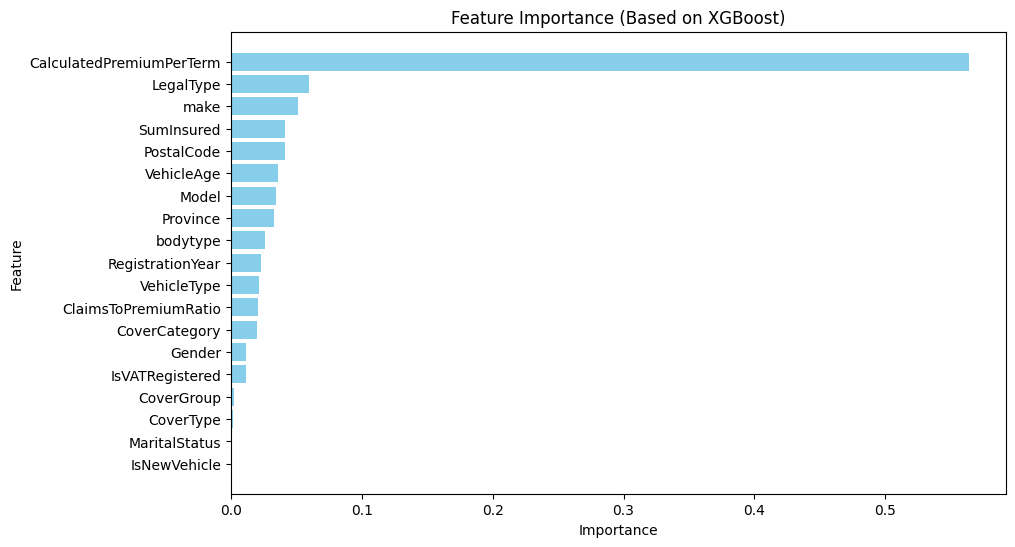

 98%|===================| 29359/30000 [00:39<00:00]        

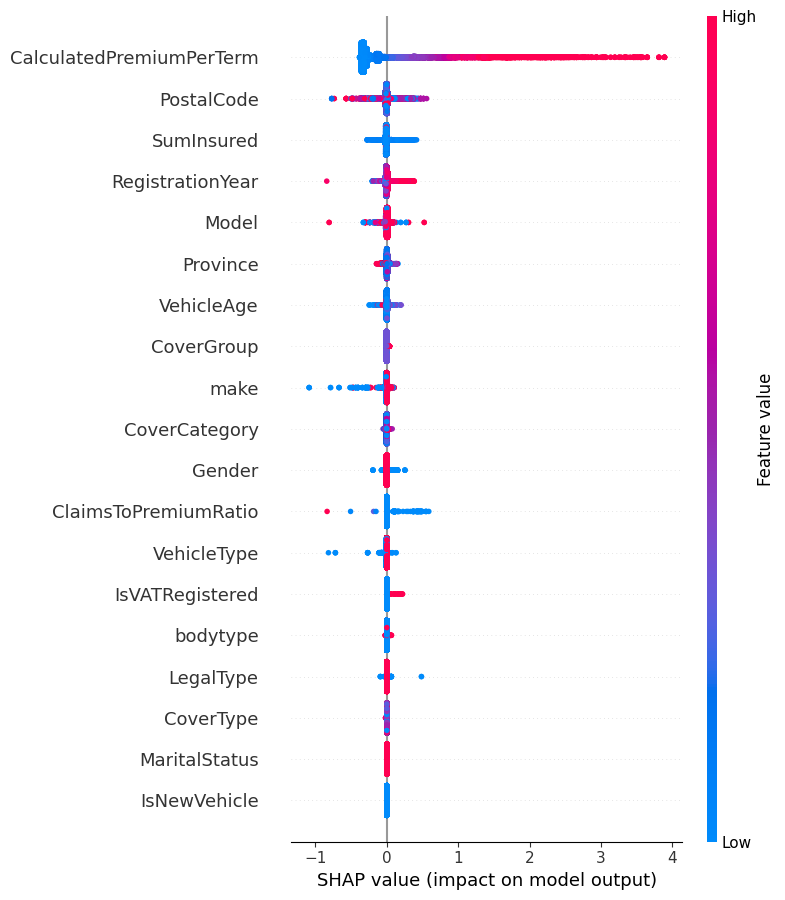

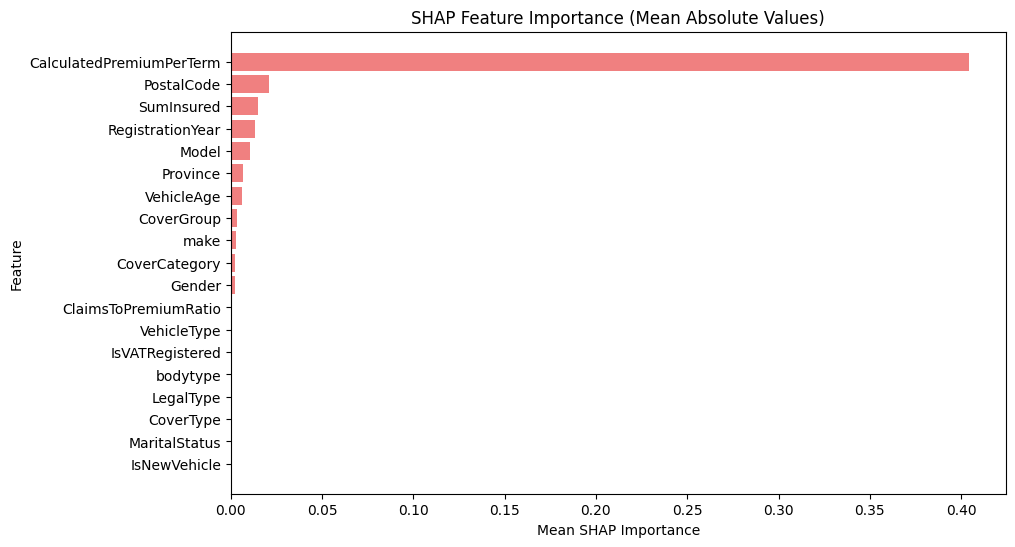

In [24]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Train the XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("XGBoost Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Step 4: Feature Importance Analysis (XGBoost Feature Importances)
print("\nFeature Importance (XGBoost):")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Based on XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 5: SHAP (SHapley Additive exPlanations) for feature importance analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Additional: Plot SHAP feature importance (mean absolute SHAP values)
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='SHAP Importance', ascending=False)

# Plot mean absolute SHAP values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'], shap_importance['SHAP Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance (Mean Absolute Values)')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Feature')
plt.show()

<h3 style="color: #11ccaa;">MODEL COMPARISION </h3>

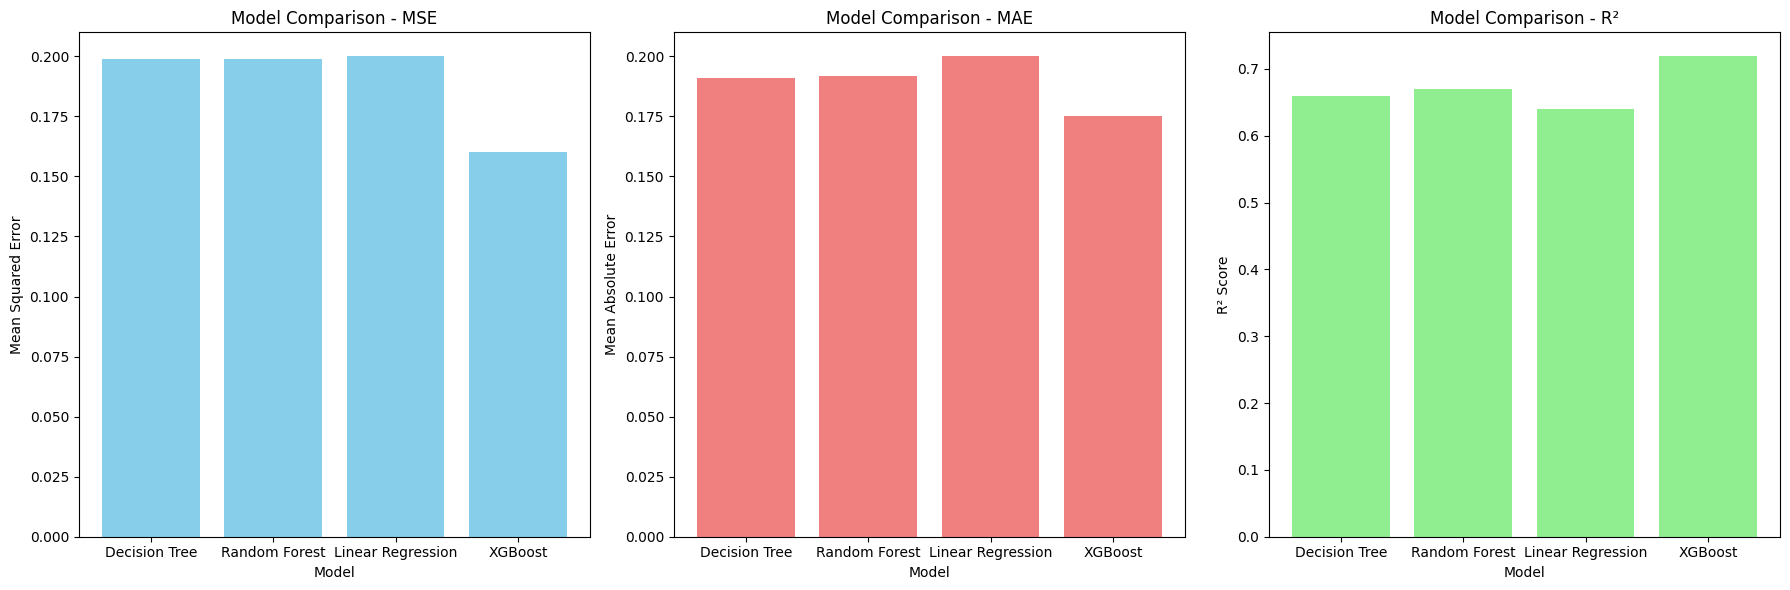

In [31]:
# Example performance metrics for 4 models
models = ['Decision Tree', 'Random Forest', 'Linear Regression', 'XGBoost']
mse_values = [0.199, 0.199, 0.20, 0.16]  # Replace with actual MSE values
mae_values = [0.191, 0.192, 0.20, 0.175]  # Replace with actual MAE values
r2_values = [0.66, 0.67, 0.64, 0.7187]  # Replace with actual R² values

# Create a DataFrame for better organization
performance_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'MAE': mae_values,
    'R²': r2_values
})

# Plotting the bar chart
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
ax[0].bar(performance_df['Model'], performance_df['MSE'], color='skyblue')
ax[0].set_title('Model Comparison - MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Model')

# Plot MAE
ax[1].bar(performance_df['Model'], performance_df['MAE'], color='lightcoral')
ax[1].set_title('Model Comparison - MAE')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_xlabel('Model')

# Plot R²
ax[2].bar(performance_df['Model'], performance_df['R²'], color='lightgreen')
ax[2].set_title('Model Comparison - R²')
ax[2].set_ylabel('R² Score')
ax[2].set_xlabel('Model')

# Adjust layout
plt.tight_layout()
plt.show()
